In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('exchange_rate.csv')

# Inspect the dataset
print(df)

                  date   Ex_rate
0     01-01-1990 00:00  0.785500
1     02-01-1990 00:00  0.781800
2     03-01-1990 00:00  0.786700
3     04-01-1990 00:00  0.786000
4     05-01-1990 00:00  0.784900
...                ...       ...
7583  06-10-2010 00:00  0.718494
7584  07-10-2010 00:00  0.721839
7585  08-10-2010 00:00  0.723197
7586  09-10-2010 00:00  0.720825
7587  10-10-2010 00:00  0.720825

[7588 rows x 2 columns]


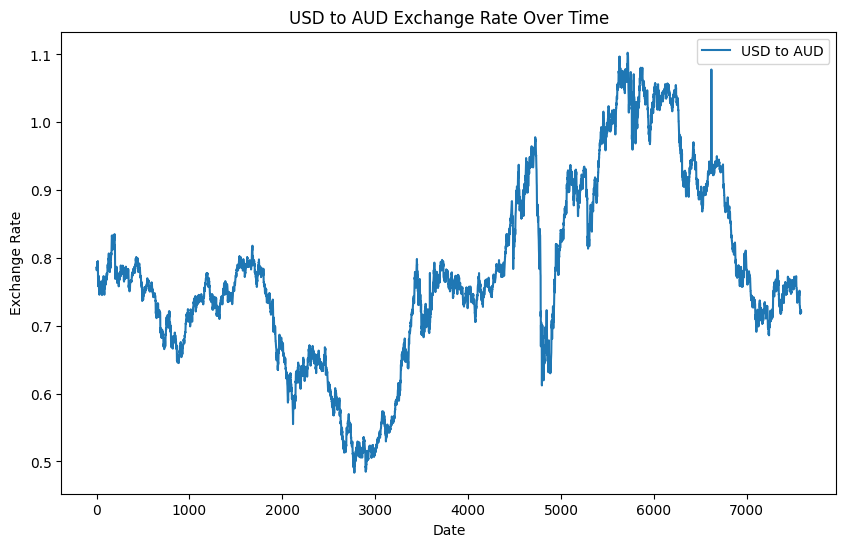

In [4]:
# Plot the time series (adjust the column name if needed)
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')  # Replace 'Ex_rate' with the correct column name from the output above
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [5]:
# Check for missing values
print(df.isnull().sum())




date       0
Ex_rate    0
dtype: int64


In [6]:
# Handle missing values (if any)
df = df.fillna(method='ffill')

In [7]:
# Verify if there are no missing values left
print(df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


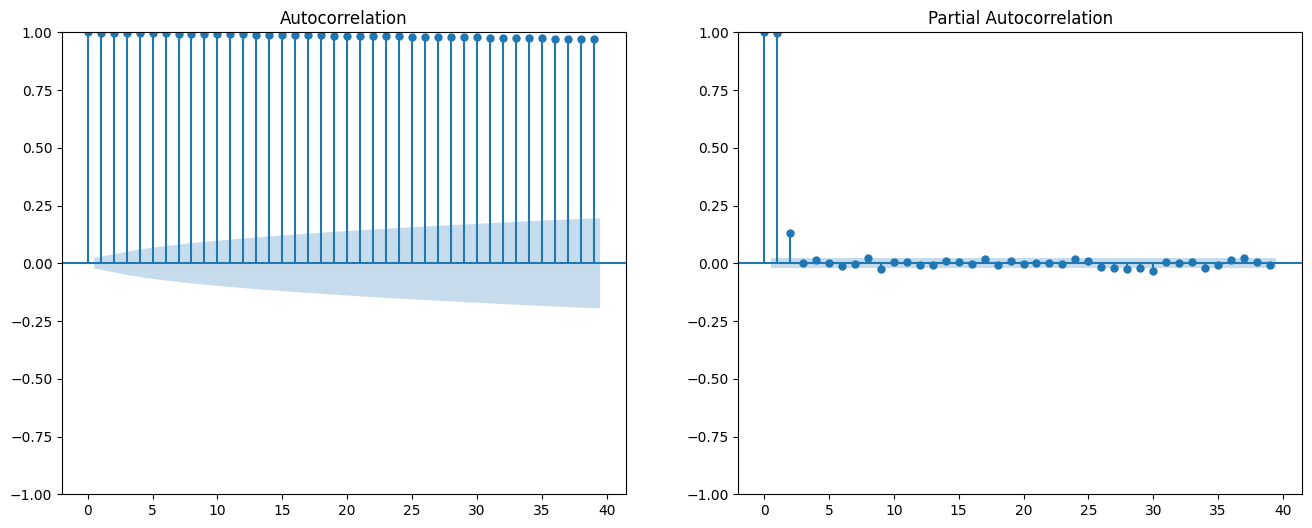

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])
plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 02 Jul 2024   AIC                         -56102.322
Time:                        08:46:05   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

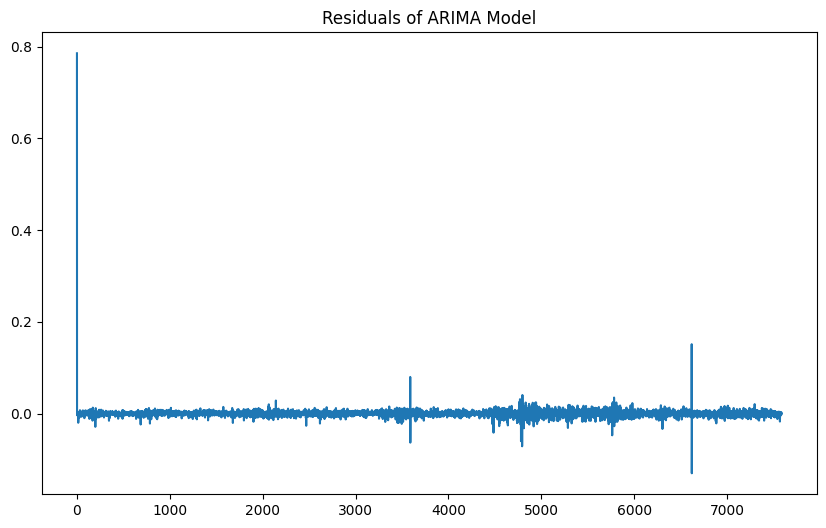

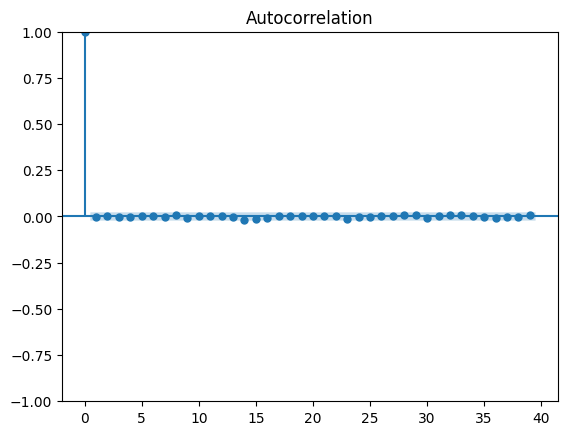

In [12]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Plot ACF of residuals
plot_acf(residuals)
plt.show()


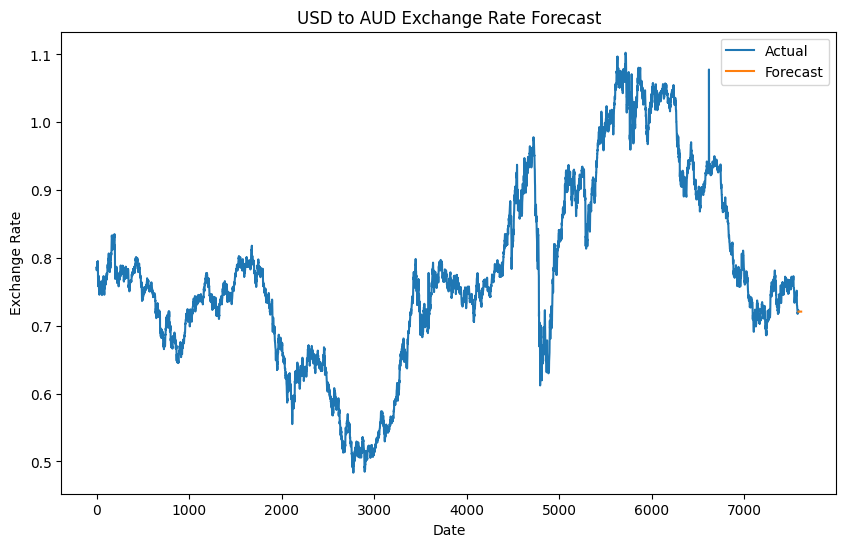

In [13]:
# Forecast
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('USD to AUD Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


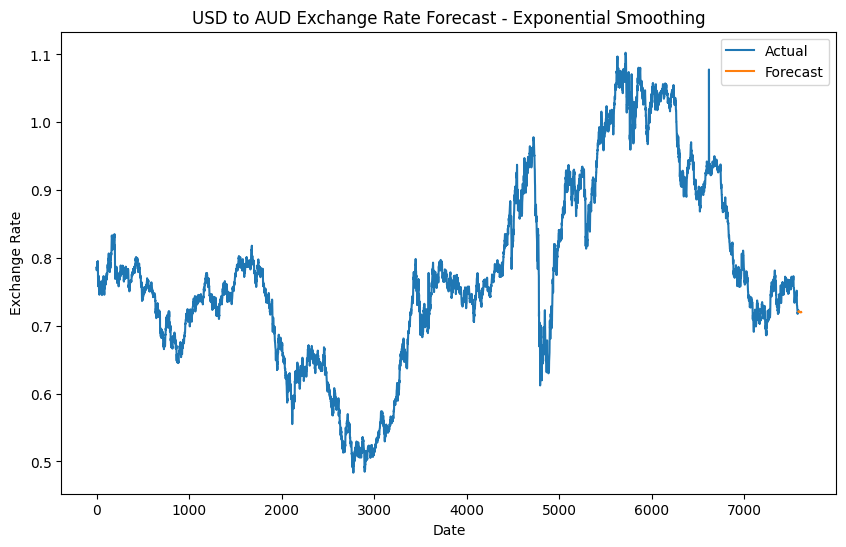

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the Exponential Smoothing model
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the model
model_es_fit = model_es.fit()

# Forecast
forecast_es = model_es_fit.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_es, label='Forecast')
plt.title('USD to AUD Exchange Rate Forecast - Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics for ARIMA
mae_arima = mean_absolute_error(df['Ex_rate'][-30:], forecast)
rmse_arima = mean_squared_error(df['Ex_rate'][-30:], forecast, squared=False)

# Calculate error metrics for Exponential Smoothing
mae_es = mean_absolute_error(df['Ex_rate'][-30:], forecast_es)
rmse_es = mean_squared_error(df['Ex_rate'][-30:], forecast_es, squared=False)

print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}')
print(f'Exponential Smoothing - MAE: {mae_es}, RMSE: {rmse_es}')


ARIMA - MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exponential Smoothing - MAE: 0.013017654522635458, RMSE: 0.017245999955208903


Here ARIMA  is best metric , due to lower MAE and RMSE values.



The ARIMA (AutoRegressive Integrated Moving Average) model's performance is evaluated using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

**Strenghts : ** ARIMA is highly flexible and can model a wide range of time series data patterns.
The model allows for the inclusion of autoregressive (AR) terms, differencing (I) to make the series stationary, and moving average (MA) terms to capture residuals.

WEAKNESS

Complexity: Selecting the right parameters (p, d, q) can be complex and time-consuming.
Stationarity Requirement: ARIMA requires the time series to be stationary, which may necessitate differencing and other preprocessing steps.
Sensitivity to Noise: ARIMA can be sensitive to noise and outliers in the data, which can affect the model's accuracy.

Performance

-->Exponential Smoothing models, including Holt-Winters, are evaluated similarly using MAE and RMSE.

--> These models smooth the time series data to forecast future values, and their performance is compared to ARIMA based on the same error metrics.



Strengths

---->Simplicity: Exponential Smoothing models are relatively simple to understand and implement.

--->Handling Trends and Seasonality: Variants like Holt-Winters can effectively handle both trend and seasonal components in the data.

--->Robustness to Noise: These models can be more robust to noise compared to ARIMA, providing smoother forecasts.



Weaknesses

--->Limited Flexibility: Compared to ARIMA, Exponential Smoothing models may be less flexible in capturing complex patterns in the data.

--->Manual Parameter Selection: Finding the optimal smoothing parameters may require manual tuning or grid search techniques.

--->Short-term Forecasts: These models are generally better suited for short-term forecasting and may not perform as well for long-term predictions.